In [1]:
import pandas as pd

# 파일 업로드
from google.colab import files
uploaded = files.upload()  # owid-covid-data.csv를 업로드하세요

# 데이터 읽기
df = pd.read_csv('owid-covid-data.csv')

Saving owid-covid-data.csv to owid-covid-data.csv


In [2]:
# 원하는 국가만 추출
wanted_df = df[df['location'].isin(['South Korea', 'France'])]

# 날짜를 인덱스로 설정
wanted_df['date'] = pd.to_datetime(wanted_df['date'])
kor_df = wanted_df[wanted_df['location'] == 'South Korea'].set_index('date')
fra_df = wanted_df[wanted_df['location'] == 'France'].set_index('date')

# 필요한 컬럼만 추출
kor_df = kor_df[['total_cases', 'population']]
fra_df = fra_df[['total_cases', 'population']]

<ipython-input-2-dba0667070fc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wanted_df['date'] = pd.to_datetime(wanted_df['date'])


In [3]:
kor_df['case_ratio'] = kor_df['total_cases'] / kor_df['population']
fra_df['case_ratio'] = fra_df['total_cases'] / fra_df['population']

In [4]:
# 공통 날짜만 추출
common_dates = kor_df.index.intersection(fra_df.index)

# 두 나라 데이터를 하나의 DataFrame으로 정리
target_df = pd.DataFrame({
    'South Korea': kor_df.loc[common_dates, 'case_ratio'],
    'France': fra_df.loc[common_dates, 'case_ratio']
})

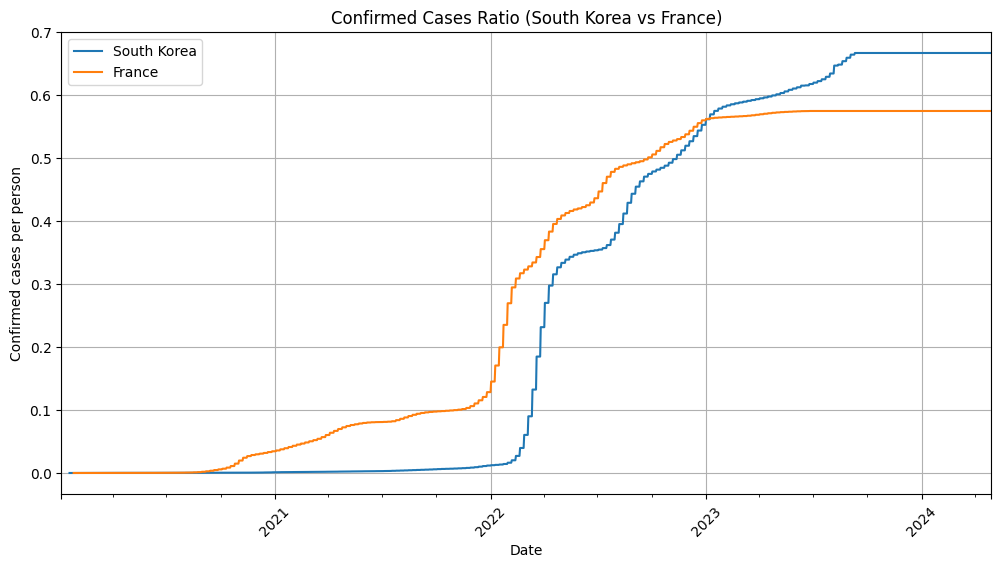

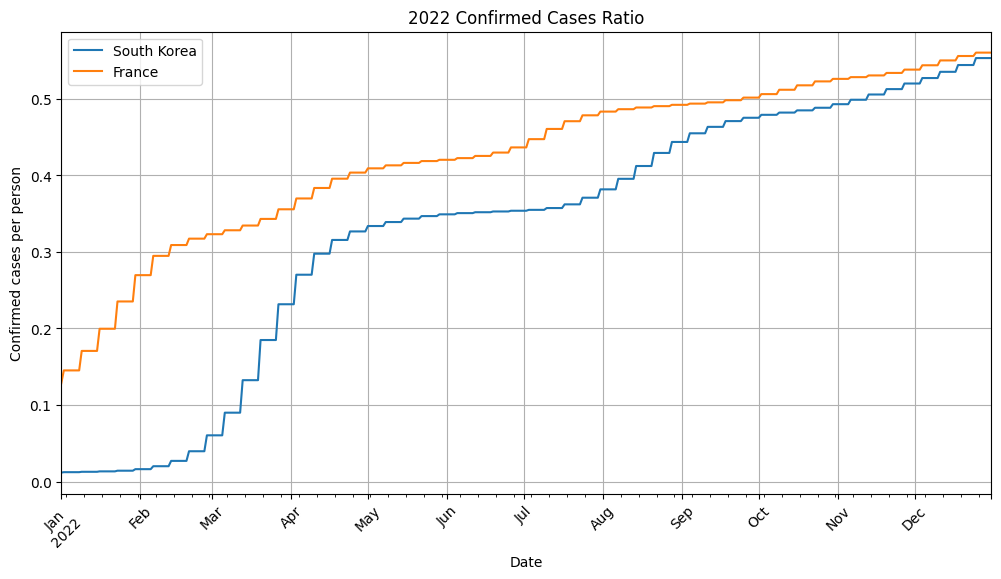

In [5]:
import matplotlib.pyplot as plt

# 전체 기간 시각화
target_df.plot(title="Confirmed Cases Ratio (South Korea vs France)", figsize=(12, 6), rot=45)
plt.ylabel("Confirmed cases per person")
plt.xlabel("Date")
plt.grid(True)
plt.show()

# 예: 2022년 데이터만 필터링해서 시각화
target_df['2022-01-01':'2022-12-31'].plot(title="2022 Confirmed Cases Ratio", figsize=(12, 6), rot=45)
plt.ylabel("Confirmed cases per person")
plt.xlabel("Date")
plt.grid(True)
plt.show()